In [1]:
!pip3 install imblearn
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_df = pd.read_csv('merged_df_ashv3.csv')

In [3]:
print(covid_df.shape)
covid_df.head(20)

(1594510, 262)


,Date,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,GDP_current_dollar,personal_income
0,2022-04-29,17,Pocahontas County,WV,97.2,4905.0,59.5,4905.0,62.5,4838.0,...,135,130,243,88,155,49.8,48.5,51.3,327472,50751
1,2022-04-29,17,Ringgold County,IA,97.4,2734.0,55.9,2734.0,59.3,2653.0,...,52,77,171,46,125,43.0,40.9,45.0,222486,57345
2,2022-04-29,17,Goliad County,TX,98.9,3763.0,49.1,3762.0,52.0,3707.0,...,77,115,183,84,99,45.9,45.1,46.7,357154,57304
3,2022-04-29,17,Ford County,KS,93.6,17835.0,53.1,17835.0,58.0,17297.0,...,204,252,569,184,385,32.0,31.5,32.6,2864494,47179
4,2022-04-29,17,Spencer County,KY,94.0,6683.0,34.5,6683.0,36.6,6361.0,...,151,151,193,75,118,42.2,42.0,42.4,371500,56264
5,2022-04-29,17,Perry County,OH,98.5,15308.0,42.4,15307.0,45.1,15048.0,...,292,410,526,162,364,41.2,40.6,41.8,869569,45943
6,2022-04-29,17,Stokes County,NC,96.9,28055.0,61.5,28047.0,64.4,27628.0,...,533,733,1197,434,763,47.2,46.0,48.4,1531829,46391
7,2022-04-29,17,Centre County,PA,94.8,114201.0,70.3,114169.0,73.1,110183.0,...,1288,1719,3092,1155,1937,34.0,32.9,35.2,10324934,54686
8,2022-04-29,17,Sibley County,MN,94.6,7768.0,52.3,7763.0,55.3,7482.0,...,146,214,446,159,287,41.8,41.6,42.1,592644,59859
9,2022-04-29,17,McCook County,SD,96.7,3915.0,70.1,3915.0,76.3,3769.0,...,70,75,111,34,77,38.4,38.1,38.6,412591,73362


In [14]:
print(covid_df.columns.values, sep=',')

['Date' 'MMWR_week' 'Recip_County' 'Recip_State' 'Completeness_pct'
 'Administered_Dose1_Recip' 'Administered_Dose1_Pop_Pct'
 'Administered_Dose1_Recip_5Plus' 'Administered_Dose1_Recip_5PlusPop_Pct'
 'Administered_Dose1_Recip_12Plus'
 'Administered_Dose1_Recip_12PlusPop_Pct'
 'Administered_Dose1_Recip_18Plus'
 'Administered_Dose1_Recip_18PlusPop_Pct'
 'Administered_Dose1_Recip_65Plus'
 'Administered_Dose1_Recip_65PlusPop_Pct' 'Series_Complete_Yes'
 'Series_Complete_Pop_Pct' 'Series_Complete_5Plus'
 'Series_Complete_5PlusPop_Pct' 'Series_Complete_5to17'
 'Series_Complete_5to17Pop_Pct' 'Series_Complete_12Plus'
 'Series_Complete_12PlusPop_Pct' 'Series_Complete_18Plus'
 'Series_Complete_18PlusPop_Pct' 'Series_Complete_65Plus'
 'Series_Complete_65PlusPop_Pct' 'Booster_Doses' 'Booster_Doses_Vax_Pct'
 'Booster_Doses_5Plus' 'Booster_Doses_5Plus_Vax_Pct'
 'Booster_Doses_12Plus' 'Booster_Doses_12Plus_Vax_Pct'
 'Booster_Doses_18Plus' 'Booster_Doses_18Plus_Vax_Pct'
 'Booster_Doses_50Plus' 'Booster

In [5]:
corr = covid_df.corr()
corr

,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
MMWR_week,1.000000,-0.073101,0.021615,0.092783,-0.003446,-0.078168,0.024854,0.092964,0.023736,0.092138,...,-0.008638,-0.003959,-0.004327,-0.003690,-0.000013,-0.000858,0.000436,-0.003159,-0.003124,-0.002866
Completeness_pct,-0.073101,1.000000,0.127775,0.637723,0.065460,0.281420,0.129424,0.633633,0.129795,0.645648,...,0.053001,0.054297,0.055920,0.053012,0.054527,0.055296,0.053890,0.023872,0.021489,0.023199
Administered_Dose1_Recip,0.021615,0.127775,1.000000,0.284448,1.000000,0.313013,0.999776,0.277623,0.999292,0.269418,...,0.697086,0.689431,0.680208,0.694149,0.685945,0.671915,0.690501,-0.130123,-0.131205,-0.130707
Administered_Dose1_Pop_Pct,0.092783,0.637723,0.284448,1.000000,0.336278,0.948648,0.283162,0.976220,0.282117,0.972888,...,0.158251,0.153538,0.155866,0.151498,0.150914,0.150892,0.150291,0.010860,0.006565,0.012038
Administered_Dose1_Recip_5Plus,-0.003446,0.065460,1.000000,0.336278,1.000000,0.333470,0.999900,0.332458,0.999682,0.321822,...,0.814883,0.807220,0.795787,0.813285,0.801749,0.783741,0.807860,-0.165232,-0.164764,-0.166295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGE85PLUS_MALE,-0.000858,0.055296,0.671915,0.150892,0.783741,0.308223,0.672800,0.146543,0.677785,0.140523,...,0.982770,0.991134,0.992094,0.987905,0.994906,1.000000,0.988087,-0.097097,-0.101392,-0.097621
AGE85PLUS_FEM,0.000436,0.053890,0.690501,0.150291,0.807860,0.310738,0.691510,0.146237,0.696304,0.140118,...,0.985828,0.990502,0.982555,0.993563,0.998567,0.988087,1.000000,-0.122920,-0.127441,-0.122441
MEDIAN_AGE_TOT,-0.003159,0.023872,-0.130123,0.010860,-0.165232,-0.074511,-0.132687,-0.005403,-0.130690,-0.005050,...,-0.120872,-0.112346,-0.098944,-0.121518,-0.114275,-0.097097,-0.122920,1.000000,0.989818,0.980992
MEDIAN_AGE_MALE,-0.003124,0.021489,-0.131205,0.006565,-0.164764,-0.080015,-0.133322,-0.009235,-0.131873,-0.008973,...,-0.124999,-0.116807,-0.103306,-0.126038,-0.118730,-0.101392,-0.127441,0.989818,1.000000,0.946677


In [10]:
c = covid_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-4470:-4460])

Bivalent_Booster_5Plus_Pop_Pct  COUNTY_FIPS_NUMBER                NaN
                                PEOPLE_POSITIVE_NEW_CASES_COUNT   NaN
                                PEOPLE_DEATH_COUNT                NaN
                                YEAR                              NaN
                                TOT_POP                           NaN
                                TOT_MALE                          NaN
                                TOT_FEMALE                        NaN
                                WA_MALE                           NaN
                                WA_FEMALE                         NaN
                                BA_MALE                           NaN
dtype: float64


In [8]:
missing = covid_df.isnull().sum()
print(missing.to_string())

Date                                             0
MMWR_week                                        0
Recip_County                                     0
Recip_State                                      0
Completeness_pct                              1660
Administered_Dose1_Recip                     46496
Administered_Dose1_Pop_Pct                    5936
Administered_Dose1_Recip_5Plus             1160458
Administered_Dose1_Recip_5PlusPop_Pct      1148146
Administered_Dose1_Recip_12Plus              96326
Administered_Dose1_Recip_12PlusPop_Pct       24946
Administered_Dose1_Recip_18Plus              78374
Administered_Dose1_Recip_18PlusPop_Pct        6994
Administered_Dose1_Recip_65Plus              78348
Administered_Dose1_Recip_65PlusPop_Pct        6968
Series_Complete_Yes                           3034
Series_Complete_Pop_Pct                       3034
Series_Complete_5Plus                      1144186
Series_Complete_5PlusPop_Pct               1144186
Series_Complete_5to17          

In [16]:
num_cols = covid_df._get_numeric_data().columns
print(num_cols, sep=',')

Index(['MMWR_week', 'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       ...
       'AGE7579_FEM', 'AGE8084_TOT', 'AGE8084_MALE', 'AGE8084_FEM',
       'AGE85PLUS_TOT', 'AGE85PLUS_MALE', 'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT',
       'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM'],
      dtype='object', length=246)


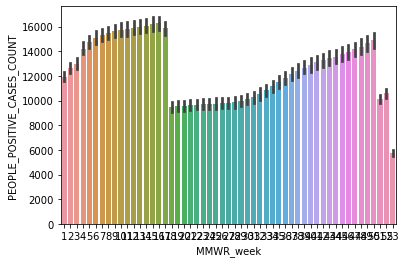

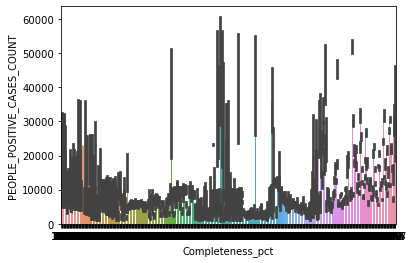

In [ ]:
# For identifying hidden categorical variables
num_col = covid_df[num_cols]
for x in num_col.columns:
    if x != "PEOPLE_POSITIVE_CASES_COUNT":
        sns.barplot(x= x, y = "PEOPLE_POSITIVE_CASES_COUNT", data = covid_df)
        plt.show()